# Fire Atlas Dataset Exploration // Day of Burn (tiff)
#### Exploring the 2016 map with geopandas
Andrew McDonald // CSE 847 // 7 March 2021

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import rasterio
from pyproj import Transformer

# 1. Rasterio Basics

In [4]:
burns = rasterio.open("2016_wildfires/Global_fire_atlas_V1_day_of_burn_2016.tif")
burns.count      # spectral bands

1

In [5]:
burns.width, burns.height       # see tiff width, height

(81600, 31200)

In [6]:
{i: dtype for i, dtype in zip(burns.indexes, burns.dtypes)}     # see tiff datatypes

{1: 'int32'}

In [7]:
burns.crs    # see coordinate system

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not_specified_based_on_custom_spheroid",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [8]:
# arr = burns.read(1)     # read in ndarray from file
# arr.shape, arr.dtype

In [9]:
burns.bounds

BoundingBox(left=-20015109.354, bottom=-6671703.118005, right=17791208.314677987, top=7783653.637666)

# 2. Extract USA Data

In [10]:
transformer = Transformer.from_crs("epsg:3857", burns.crs)
bounds3857 = [(-14225848.2082,2798206.7315),(-7103140.1645,6457400.1495)]       # usa bounding box from http://bboxfinder.com/
coord = [transformer.transform(x, y) for x, y in bounds3857]
coord

[(-12944132.683962785, 2709502.4591529975),
 (-4554614.313758525, 5566890.402306576)]

In [11]:
maxrow, mincol = burns.index(*coord[0])     # bottom left corner
minrow, maxcol = burns.index(*coord[1])     # top left corner
minrow, mincol, maxrow, maxcol

(4784, 15261, 10951, 33369)

In [12]:
# usa_arr = arr[minrow:maxrow, mincol:maxcol]
# usa_arr.shape

In [13]:
# plt.contourf(usa_arr)

In [14]:
# with rasterio.open(
#     '2016_wildfires/usa_day_of_burn.tif',
#     'w',
#     driver='GTiff',
#     height=usa_arr.shape[0],
#     width=usa_arr.shape[1],
#     count=1,
#     dtype=usa_arr.dtype,
#     crs=burns.crs,
#     transform=burns.transform,
# ) as dst:
#     dst.write(usa_arr[np.newaxis, :, :])

In [15]:
# usa_arr.min(), usa_arr.max()

# 2. Explore Downsized GeoTiffs

In [27]:
burns = rasterio.open("2016_wildfires/day_of_burn/x19000y8000.tif")
arr = burns.read(1)
arr.min(), arr.max(), arr.shape

(0, 337, (1000, 1000))

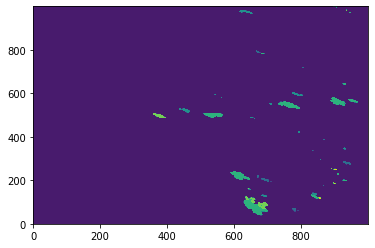

In [28]:
plt.contourf(arr)

In [29]:
burns.bounds

BoundingBox(left=-11212167.739969585, bottom=3613839.1889147502, right=-10748855.023441669, top=4077151.9054426667)